<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-02-12 22:38:40--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.14.222
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.14.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  16.8MB/s    in 13s     

2020-02-12 22:38:54 (15.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np 


In [0]:
# need these four dataframes 
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [7]:
order_products = pd.concat([order_products_prior, order_products_train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
products = products.drop(['aisle_id', 'department_id'], axis=1)
# droppped aisle and department columns to save ram

In [10]:
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [0]:
orders_and_products = pd.merge(order_products, orders, on='order_id', how='inner')

In [12]:
print(orders_and_products.shape)
orders_and_products.head(10)

(33819106, 10)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
5,2,17794,6,1,202279,prior,3,5,9,8.0
6,2,40141,7,1,202279,prior,3,5,9,8.0
7,2,1819,8,1,202279,prior,3,5,9,8.0
8,2,43668,9,0,202279,prior,3,5,9,8.0
9,3,33754,1,1,205970,prior,16,5,17,12.0


In [0]:
# need to drop columns to save RAM
orders_and_products_lite = orders_and_products.drop(['add_to_cart_order', 'reordered', 'eval_set','order_dow', 'order_hour_of_day', 'days_since_prior_order'], axis=1)

In [14]:
print(orders_and_products_lite.shape)
orders_and_products_lite.head()

(33819106, 4)


,order_id,product_id,user_id,order_number
0,2,33120,202279,3
1,2,28985,202279,3
2,2,9327,202279,3
3,2,45918,202279,3
4,2,30035,202279,3


In [0]:
orders_by_product_id = pd.merge(products, orders_and_products_lite, on='product_id', how='inner')


In [16]:
print(orders_by_product_id.shape)
orders_by_product_id.head()

(33819106, 5)


,product_id,product_name,order_id,user_id,order_number
0,1,Chocolate Sandwich Cookies,1107,38259,2
1,1,Chocolate Sandwich Cookies,5319,196224,65
2,1,Chocolate Sandwich Cookies,7540,138499,8
3,1,Chocolate Sandwich Cookies,9228,79603,2
4,1,Chocolate Sandwich Cookies,9273,50005,1


In [17]:
orders_by_product_id['product_name'].value_counts()[:10]

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [0]:
# Success

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# lesson code
import seaborn as sns
import matplotlib.pyplot as plt

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

In [20]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [21]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [22]:
tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [23]:
tidy1 = tidy1.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [24]:
tidy1.trt = tidy1.trt.str.replace('treatment','')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [25]:
wide = tidy1.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
flights = sns.load_dataset('flights')
# Goal: 112 passengers for January 1949 and 432 passengers for December 1960.

In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [28]:
# flights to pivot table
flights_pt = flights.pivot_table(index='year', columns='month', values='passengers')
flights_pt

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


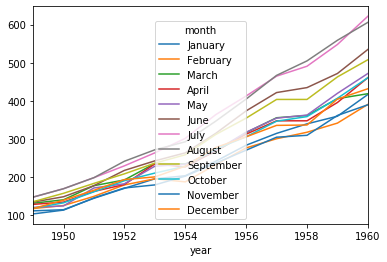

In [90]:
flights_pt.plot();

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



#Note I could not figure this out...below is just a bunch of attempts to figure it out haha

In [46]:
orders_by_product_id['product_name'].value_counts()

Banana                                             491291
Bag of Organic Bananas                             394930
Organic Strawberries                               275577
Organic Baby Spinach                               251705
Organic Hass Avocado                               220877
                                                    ...  
Pantene Pro-V Color Preserve Volume Conditioner         1
Chocolate Peppermint Tart                               1
Lindor Peppermint White Chocolate Truffles              1
Sweetart Jelly Beans                                    1
String Of Pearl White Sprinkles                         1
Name: product_name, Length: 49685, dtype: int64

In [0]:
orders_by_product_id = pd.merge(products, orders_and_products, on='product_id', how='inner')


Hint: Make a list of items with over 2900, then find which of those were ordered latest?  Or find which orders were ordered latest, then filter out which ones have over 2900?

In [128]:
product_freq = orders_by_product_id['product_name'].value_counts().reset_index().head(1000)
cnt_srs.columns = ['product_name', 'frequency_count']
product_freq

,index,product_name
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
...,...,...
995,Honey & Maple Turkey Breast,5687
996,Organic Coconut Water,5687
997,"Almondmilk Creamer, Vanilla",5686
998,Gogo Squeez Organic Apple Strawberry Applesauc...,5680


In [0]:
# lets work with a smaller data set
subset = pd.DataFrame(orders_by_product_id, columns= ['product_id','product_name', 'order_id', 'order_hour_of_day'])

In [126]:
subset.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,1,Chocolate Sandwich Cookies,5319,14
2,1,Chocolate Sandwich Cookies,7540,14
3,1,Chocolate Sandwich Cookies,9228,10
4,1,Chocolate Sandwich Cookies,9273,15


In [0]:
over2900orders = subset['product_name'].value_counts() > 2900


In [0]:
over2900 = subset['product_name'].value_counts().head(400).index

In [71]:
over2900

Index(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk',
       'Organic Raspberries', 'Organic Yellow Onion', 'Organic Garlic',
       'Organic Zucchini', 'Organic Blueberries', 'Cucumber Kirby',
       'Organic Fuji Apple', 'Organic Lemon', 'Organic Grape Tomatoes',
       'Apple Honeycrisp Organic', 'Seedless Red Grapes', 'Organic Cucumber',
       'Honeycrisp Apple', 'Organic Baby Carrots',
       'Sparkling Water Grapefruit', 'Organic Half & Half',
       'Organic Large Extra Fancy Fuji Apple', 'Yellow Onions',
       'Organic Baby Arugula', 'Organic Gala Apples', 'Carrots',
       'Fresh Cauliflower', 'Original Hummus', 'Organic Cilantro',
       'Half & Half', 'Asparagus', 'Organic Red Onion',
       'Organic Small Bunch Celery', 'Michigan Organic Kale',
       'Organic Tomato Cluster', 'Organic Blackberries',
       '100% Whole

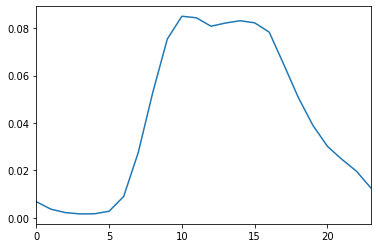

In [63]:
(subset['order_hour_of_day'].value_counts(normalize=True).sort_index().plot());

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

# looking at the percentages of reorders and non-reorders

In [98]:
orders_by_product_id.head()

,product_id,product_name,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Over2900
0,1,Chocolate Sandwich Cookies,1107,7,0,38259,prior,2,1,11,7.0,NaN
1,1,Chocolate Sandwich Cookies,5319,3,1,196224,prior,65,1,14,1.0,NaN
2,1,Chocolate Sandwich Cookies,7540,4,1,138499,prior,8,0,14,7.0,NaN
3,1,Chocolate Sandwich Cookies,9228,2,0,79603,prior,2,2,10,30.0,NaN
4,1,Chocolate Sandwich Cookies,9273,30,0,50005,prior,1,1,15,NaN,NaN


In [99]:
orders_and_products.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [100]:
# percent of reorders in all the orders
orders_and_products.reordered.sum() / order_products.shape[0]


0.5900617242809434

In [105]:
reordered_df = orders_and_products.groupby('order_id')['reordered'].aggregate('sum').reset_index()
reordered_df.head()


,order_id,reordered
0,1,4
1,2,6
2,3,8
3,4,12
4,5,21


In [106]:
# products that are never reordered
reordered_df['reordered'].ix[reordered_df['reordered']>1] =1
reordered_df.reordered.value_counts() / reordered_df.shape[0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1    0.881319
0    0.118681
Name: reordered, dtype: float64

59% of items are reordered while 11% of products are never reordered

In [0]:
# plotting products bought in order
purchase_order_df = orders_and_products.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()

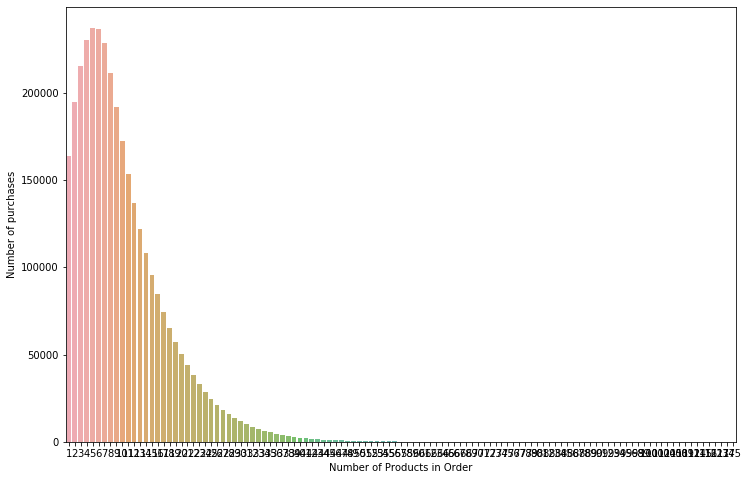

In [110]:
cnt_srs = purchase_order_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of purchases')
plt.xlabel('Number of Products in Order')
plt.show();
